In [42]:
# to handle datasets
import pandas as pd
pd.pandas.set_option('display.max_columns', None)

import numpy as np

# for plotting
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### Load Datasets

In [2]:
# load dataset
data = pd.read_csv('data/train.csv')
print(data.shape)
data.head()

(1460, 81)


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [3]:
# Load the dataset for submission (the one on which our model will be evaluated by Kaggle)
# it contains exactly the same variables, but not the target

test = pd.read_csv('data/test.csv')
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,896,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,6,1958,1958,Hip,CompShg,Wd Sdng,Wd Sdng,BrkFace,108.0,TA,TA,CBlock,TA,TA,No,ALQ,923.0,Unf,0.0,406.0,1329.0,GasA,TA,Y,SBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,Gd,6,Typ,0,NaN,Attchd,1958.0,Unf,1.0,312.0,TA,TA,Y,393,36,0,0,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,5,5,1997,1998,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,GLQ,791.0,Unf,0.0,137.0,928.0,GasA,Gd,Y,SBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,TA,6,Typ,1,TA,Attchd,1997.0,Fin,2.0,482.0,TA,TA,Y,212,34,0,0,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,1Fam,2Story,6,6,1998,1998,Gable,CompShg,VinylSd,VinylSd,BrkFace,20.0,TA,TA,PConc,TA,TA,No,GLQ,602.0,Unf,0.0,324.0,926.0,GasA,Ex,Y,SBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,1998.0,Fin,2.0,470.0,TA,TA,Y,360,36,0,0,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,Inside,Gtl,StoneBr,Norm,Norm,TwnhsE,1Story,8,5,1992,1992,Gable,CompShg,HdBoard,HdBoard,None,0.0,Gd,TA,PConc,Gd,TA,No,ALQ,263.0,Unf,0.0,1017.0,1280.0,GasA,Ex,Y,SBrkr,1280,0,0,1280,0.0,0.0,2,0,2,1,Gd,5,Typ,0,NaN,Attchd,1992.0,RFn,2.0,506.0,TA,TA,Y,0,82,0,0,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


### Types of variables

In [4]:

# let's inspect the type of variables in pandas
data.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold             int64
YrSold             int64
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

#There are a mixture of categorical and numerical variables. Numerical are those of type int and float and categorical those of type object.

### Id variable, that we shoulld not use for predictions:

In [5]:
# we also have an Id variable, that we shoulld not use for predictions:
print('Number of House Id labels:', len(data.Id.unique()))
print('Number of Houses in the Dataset:', len(data))


Number of House Id labels: 1460
Number of Houses in the Dataset: 1460


Id is a unique identifier for each of the houses. Thus this is not a variable that we can use.

### Find categorical variables

In [6]:
# find categorical variables
categorical = [var for var in data.columns if data[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))


There are 43 categorical variables


In [7]:
# for var in data.columns :
#      if data[var].dtype=='O':
#             print(var)
#             print('There are {} categorical variables'.format(len(categorical)))

### Numerical variables

In [8]:
# make a list of the numerical variables first
numerical = [var for var in data.columns if data[var].dtype!='O']


### Find temporal variables

There are a few variables in the dataset that are temporal. They indicate the year in which something happened. We shouldn't use these variables straightaway for model building. We should instead transform them to capture some sort of time information. Let's inspect these temporal variables:

In [9]:
# list of variables that contain year information
year_vars = [var for var in numerical if 'Yr' in var or 'Year' in var]

year_vars

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [10]:
data[year_vars].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


We can see that these variables correspond to the years in which the houses were built or remodeled or a garage was built, or the house was indeed sold. It would be better if we captured the time elapsed between the time the house was built and the time the house was sold

Text(0, 0.5, 'mean House price')

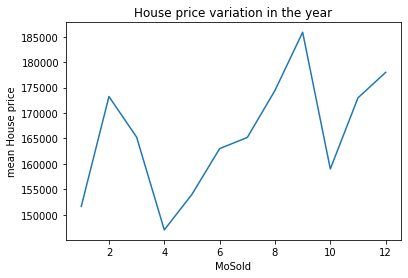

In [11]:
#We have another temporal variable: MoSold, which indicates the month in which the house was sold. Let's inspect if the house price varies with the time of the year in which it is sold:
data.groupby('MoSold')['SalePrice'].median().plot()
plt.title('House price variation in the year')
plt.ylabel('mean House price')

### Find discrete variables

#To identify discrete variables, I will select from all the numerical ones, those that contain a finite and small number of distinct values. .

In [12]:
# let's visualise the values of the discrete variables
discrete = []

for var in numerical:
    if len(data[var].unique())<20 and var not in year_vars:
        print(var, ' values: ', data[var].unique())
        discrete.append(var)
print()
print('There are {} discrete variables'.format(len(discrete)))

MSSubClass  values:  [ 60  20  70  50 190  45  90 120  30  85  80 160  75 180  40]
OverallQual  values:  [ 7  6  8  5  9  4 10  3  1  2]
OverallCond  values:  [5 8 6 7 4 2 3 9 1]
BsmtFullBath  values:  [1 0 2 3]
BsmtHalfBath  values:  [0 1 2]
FullBath  values:  [2 1 3 0]
HalfBath  values:  [1 0 2]
BedroomAbvGr  values:  [3 4 1 2 0 5 6 8]
KitchenAbvGr  values:  [1 2 3 0]
TotRmsAbvGrd  values:  [ 8  6  7  9  5 11  4 10 12  3  2 14]
Fireplaces  values:  [0 1 2 3]
GarageCars  values:  [2 3 1 0 4]
PoolArea  values:  [  0 512 648 576 555 480 519 738]
MoSold  values:  [ 2  5  9 12 10  8 11  4  1  7  3  6]

There are 14 discrete variables


### Continuous variables

In [13]:
# find continuous variables
# let's remember to skip the Id variable and the target variable SalePrice, which are both also numerical

numerical = [var for var in numerical if var not in discrete and var not in ['Id', 'SalePrice'] and var not in year_vars]
print('There are {} numerical and continuous variables'.format(len(numerical)))


There are 18 numerical and continuous variables


### Types of problems within the variables

### Missing values

In [14]:
# let's visualise the percentage of missing values for each variable
for var in data.columns:
    if data[var].isnull().sum():
        print(var, data[var].isnull().mean())

LotFrontage 0.1773972602739726
Alley 0.9376712328767123
MasVnrType 0.005479452054794521
MasVnrArea 0.005479452054794521
BsmtQual 0.025342465753424658
BsmtCond 0.025342465753424658
BsmtExposure 0.026027397260273973
BsmtFinType1 0.025342465753424658
BsmtFinType2 0.026027397260273973
Electrical 0.0006849315068493151
FireplaceQu 0.4726027397260274
GarageType 0.05547945205479452
GarageYrBlt 0.05547945205479452
GarageFinish 0.05547945205479452
GarageQual 0.05547945205479452
GarageCond 0.05547945205479452
PoolQC 0.9952054794520548
Fence 0.8075342465753425
MiscFeature 0.963013698630137


In [15]:
# let's no determine how many variables we have with missing information

vars_with_na = [var for var in data.columns if data[var].isnull().sum()>0]
print('Total variables that contain missing information: ', len(vars_with_na))

Total variables that contain missing information:  19


There are quite a few variables with missing information. And they differ in the percentage of observations for which information are missing. Let's go ahead and inspect those variables that show missing information for most of their observations.

In [16]:
# let's inspect the type of those variables with a lot of missing information
for var in data.columns:
    if data[var].isnull().mean()>0.80:
        print(var, data[var].unique())

Alley [nan 'Grvl' 'Pave']
PoolQC [nan 'Ex' 'Fa' 'Gd']
Fence [nan 'MnPrv' 'GdWo' 'GdPrv' 'MnWw']
MiscFeature [nan 'Shed' 'Gar2' 'Othr' 'TenC']


The variables that contain a lot of missing data are categorical variables. We will need to fill those out later in the feature engineering section.

### Outliers

In [17]:
# let's look at the numerical variables
numerical

['LotFrontage',
 'LotArea',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'MiscVal']

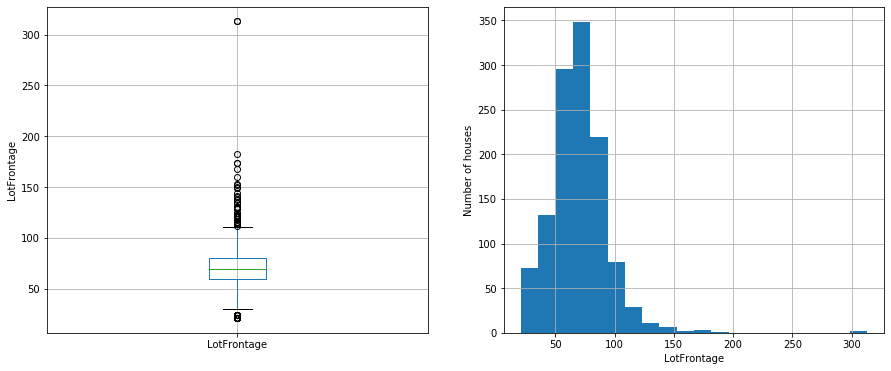

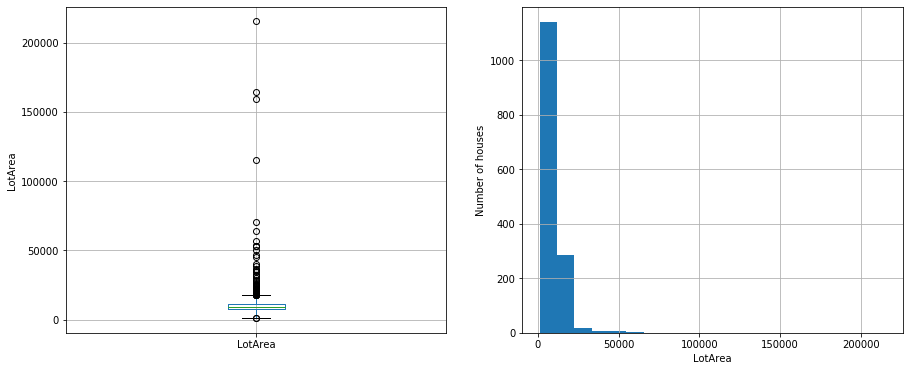

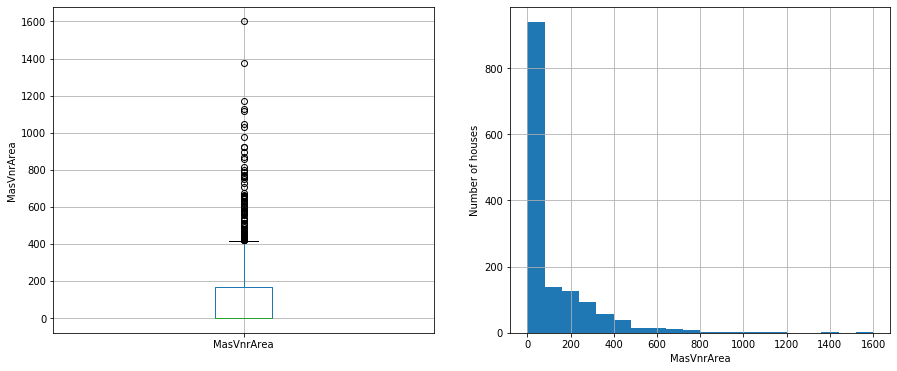

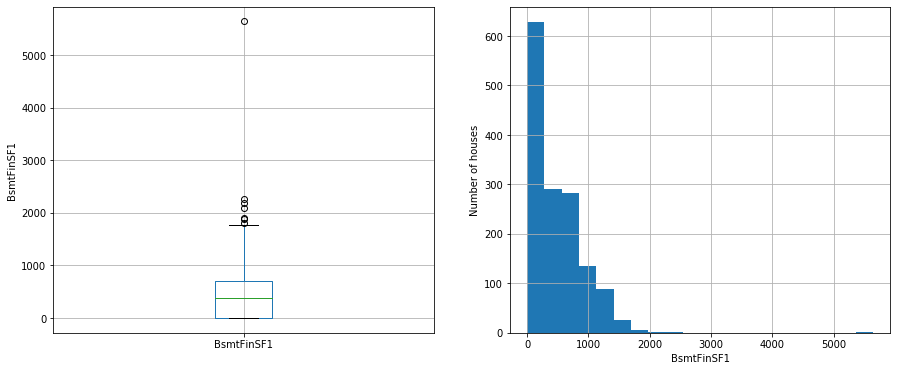

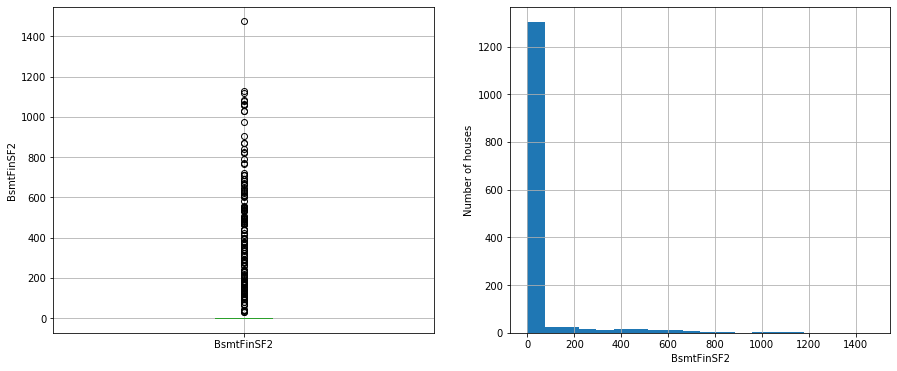

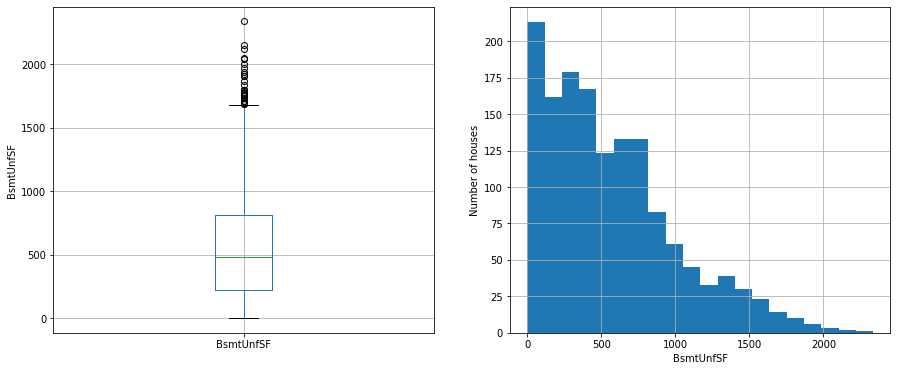

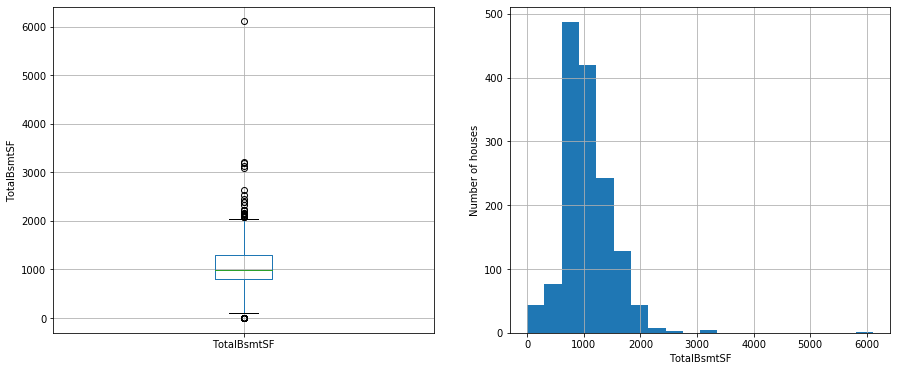

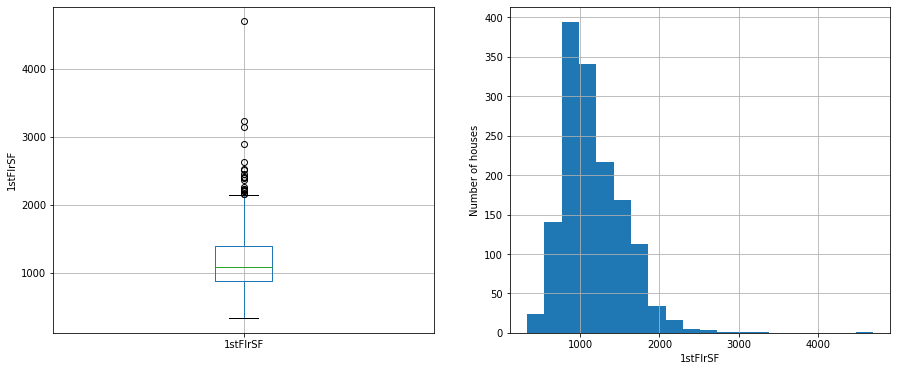

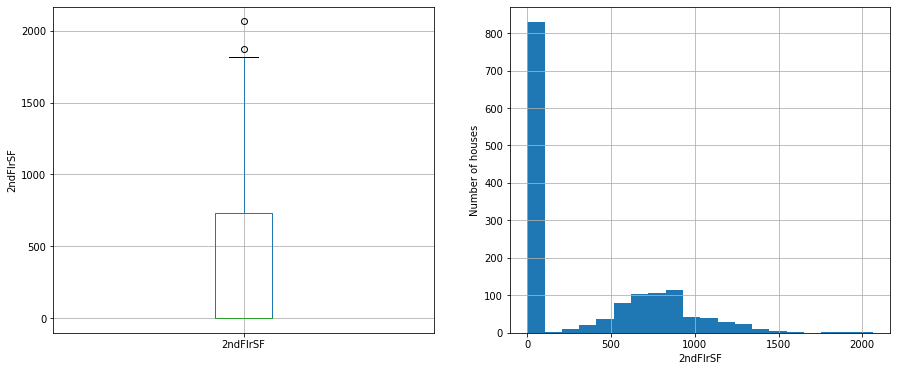

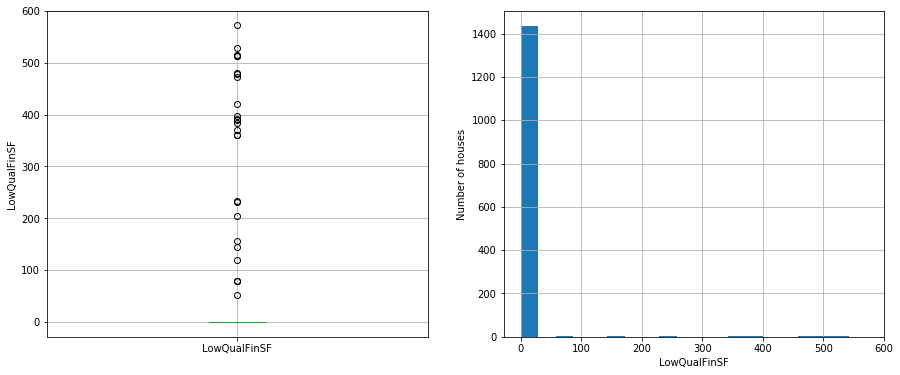

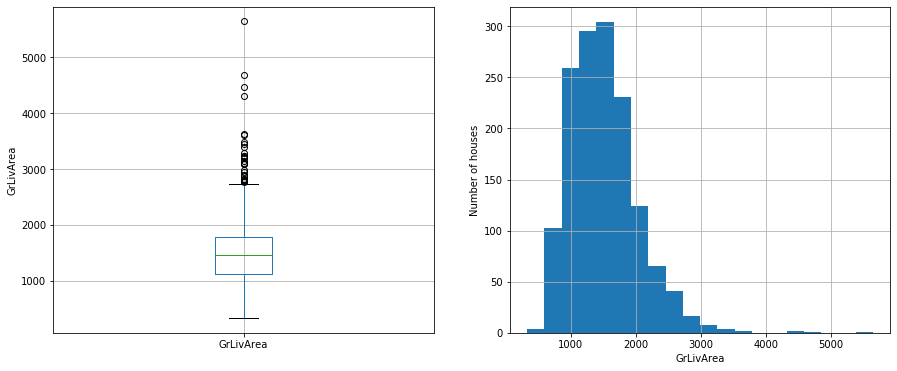

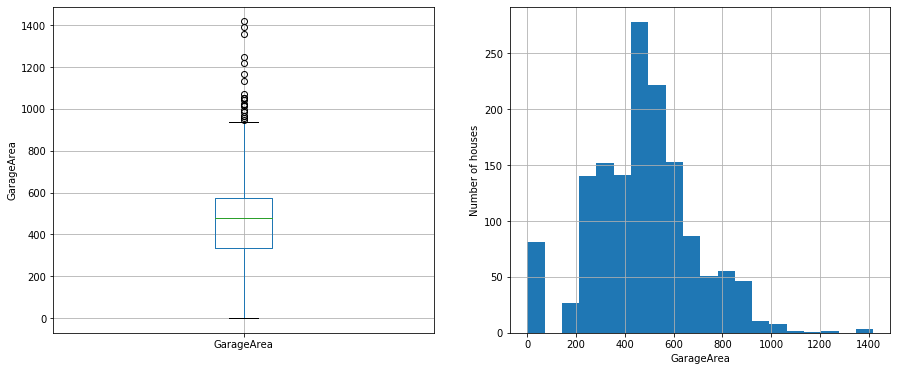

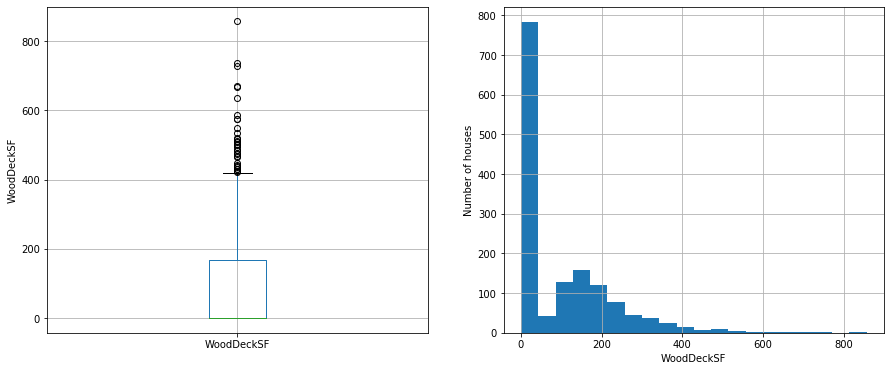

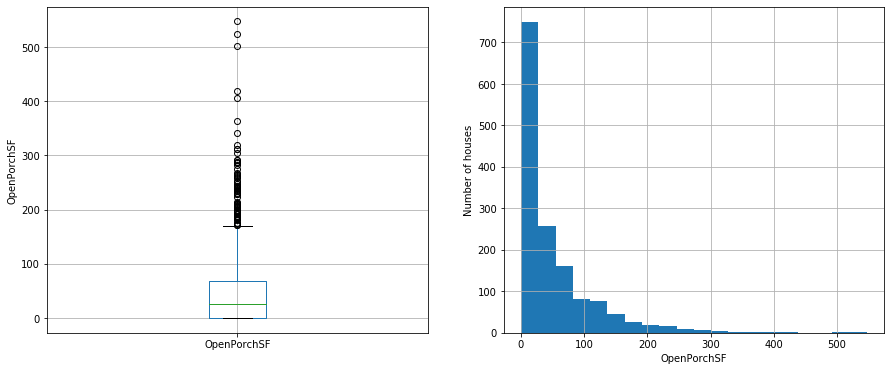

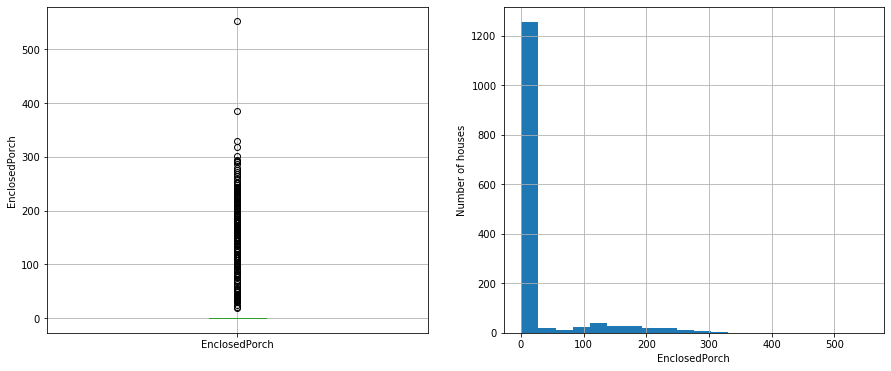

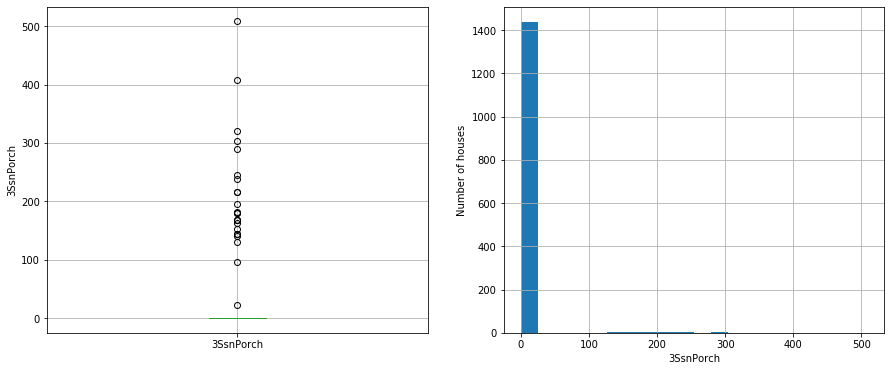

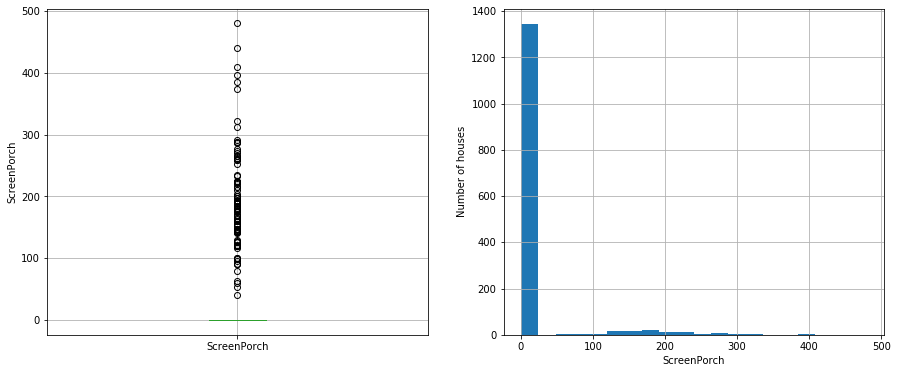

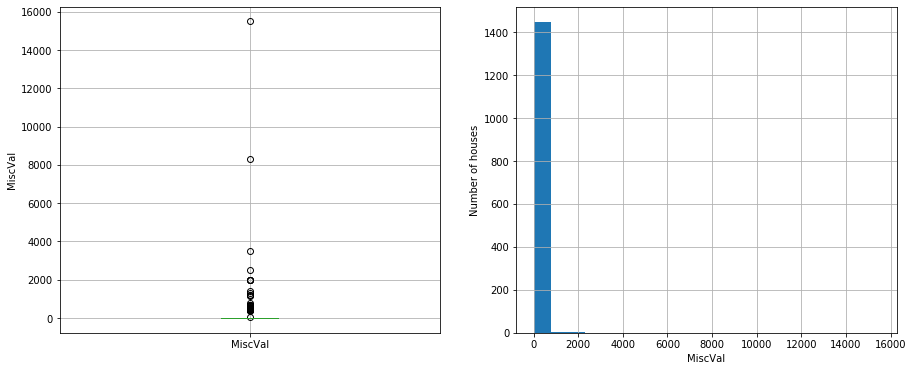

In [18]:
# let's make boxplots to visualise outliers in the continuous variables 
# and histograms to get an idea of the distribution

for var in numerical:
    plt.figure(figsize=(15,6))
    plt.subplot(1, 2, 1)
    fig = data.boxplot(column=var)
    fig.set_title('')
    fig.set_ylabel(var)
    
    plt.subplot(1, 2, 2)
    fig = data[var].hist(bins=20)
    fig.set_ylabel('Number of houses')
    fig.set_xlabel(var)

    plt.show()


The majority of the continuous variables seem to contain outliers. In addition, the majority of the variables are not normally distributed. If we are planning to build linear regression, we might need to tackle these to improve the model performance. To tackle the 2 aspects together, I will do discretisation. And in particular, I will use trees to find the right buckets onto which I will divide the variables.



### Outliers in discrete variables

Now, let's identify outliers in numerical discrete variables. I will call outliers, those values that are present in less than 1% of the houses. This is exactly the same as finding rare labels in categorical variables. Discrete variables, in essence can be pre-processed / engineered as if they were categorical. Keep this in mind.

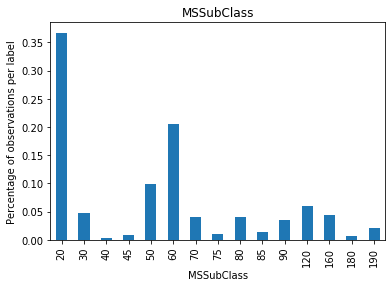

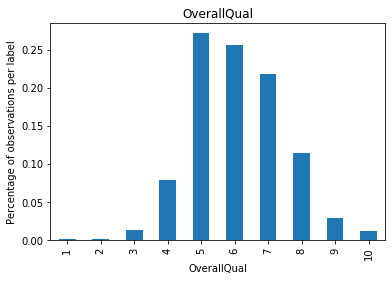

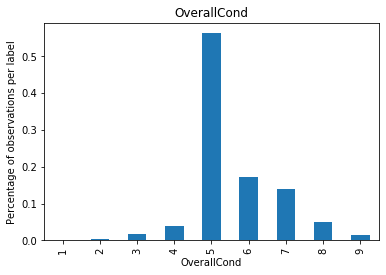

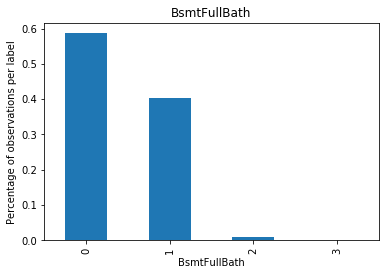

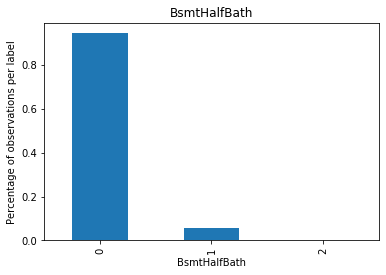

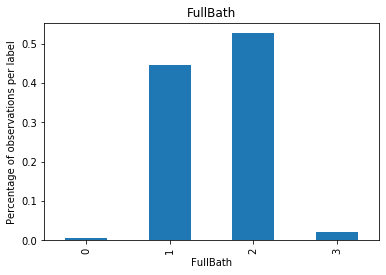

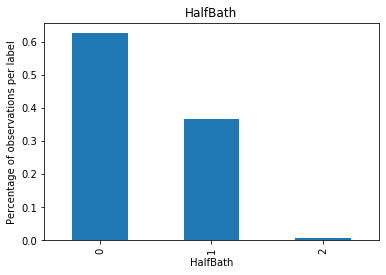

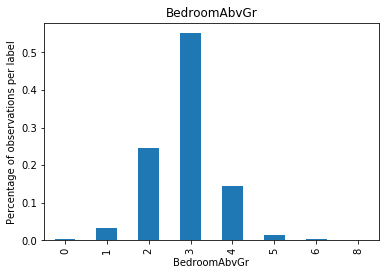

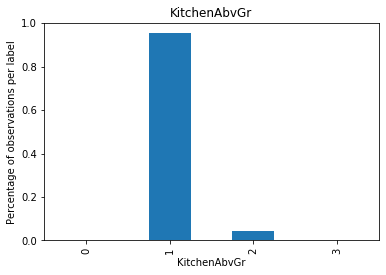

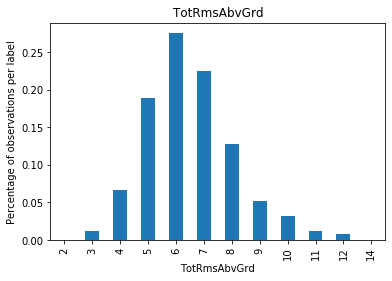

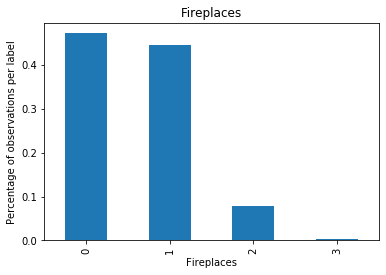

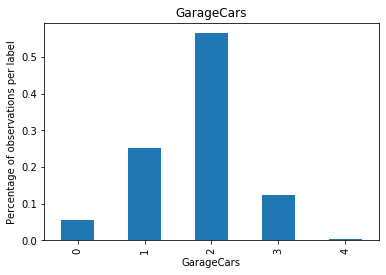

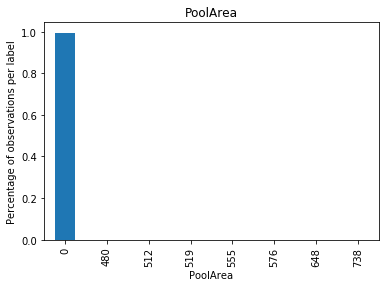

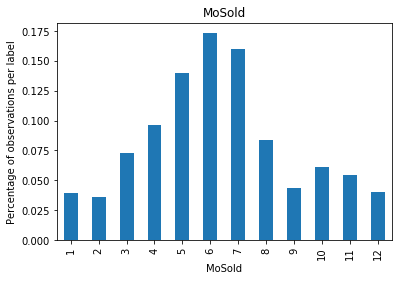

In [19]:
# outlies in discrete variables
for var in discrete:
    (data.groupby(var)[var].count() / np.float(len(data))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()
    #print(data[var].value_counts() / np.float(len(data)))
    print()

Most of the discrete variables show values that are shared by a tiny proportion of houses in the dataset. For linear regression, this may not be a problem, but it most likely will be for tree methods.



### Number of labels: cardinality

Text(0, 0.5, 'Number of different categories')

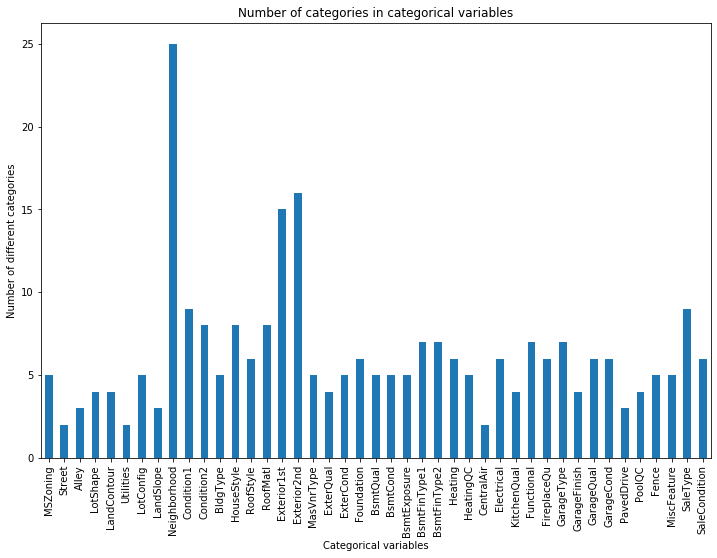

In [20]:
# determine whether they show high cardinality. This is, a high number of labels.

no_labels_ls = []
for var in categorical:
    no_labels_ls.append(len(data[var].unique()))
    
 
tmp = pd.Series(no_labels_ls)
tmp.index = pd.Series(categorical)
tmp.plot.bar(figsize=(12,8))
plt.title('Number of categories in categorical variables')
plt.xlabel('Categorical variables')
plt.ylabel('Number of different categories')

Most of the variables, contain only a few labels. Then, we do not have to deal with high cardinality. That is good news!

### Separate train and test set

In [21]:
# Let's separate into train and test set


# to divide train and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, data.SalePrice, test_size=0.1,
                                                    random_state=0)
X_train.shape, X_test.shape

((1314, 81), (146, 81))

# Feature Eng

### First, we will create those temporal variables 

In [22]:
# function to calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and year the house was sold
    df[var] = df['YrSold'] - df[var]
    return df

In [24]:
for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)
    test = elapsed_years(test, var)
   

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


In [25]:
X_train[['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']].head()

,YearBuilt,YearRemodAdd,GarageYrBlt
930,2007,2,2.0
656,1959,2,49.0
45,2005,5,5.0
1348,1998,9,9.0
55,1964,44,44.0


Instead of years, now we have the amount of years passed since the house was built or remodeled and the house was sold. Next, we drop the YrSold variable from the datasets, because we already extracted its value.

In [26]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)
test.drop('YrSold', axis=1, inplace=True)


C:\Users\t\anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


### Engineering missing values in numerical variables

### Continuous variables

In [27]:
# print variables with missing data
# keep in mind that now that we created those new temporal variables, we
# are going to treat them as numerical and continuous as well:

# remove YrSold because it is no longer in our dataset
year_vars.remove('YrSold')

# examine percentage of missing values
for col in numerical+year_vars:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

LotFrontage 0.17732115677321156
MasVnrArea 0.0045662100456621
GarageYrBlt 0.0563165905631659


LotFrontage and GarageYrBlt: These variables show more than 5% NA, so I create additional variable with NA + median imputation

CMasVnrArea: Less than 5% NA so: median imputation

In [28]:
# add variable indicating missingness + median imputation
for df in [X_train, X_test,test]:
    for var in ['LotFrontage', 'GarageYrBlt']:
        df[var+'_NA'] = np.where(df[var].isnull(), 1, 0)
        df[var].fillna(X_train[var].median(), inplace=True) 

for df in [X_train, X_test, test]:
    df['MasVnrArea'].fillna(X_train.MasVnrArea.median(), inplace=True)

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\t\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


### Discrete variables

In [29]:
# print variables with missing data
for col in discrete:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

There are no missing data in the discrete variables. Good, then we don't have to engineer them.

### Engineering Missing Data in categorical variables 

In [31]:
# print variables with missing data
for col in categorical:
    if X_train[col].isnull().mean()>0:
        print(col, X_train[col].isnull().mean())

Alley 0.9383561643835616
MasVnrType 0.0045662100456621
BsmtQual 0.0243531202435312
BsmtCond 0.0243531202435312
BsmtExposure 0.02511415525114155
BsmtFinType1 0.0243531202435312
BsmtFinType2 0.02511415525114155
Electrical 0.00076103500761035
FireplaceQu 0.4726027397260274
GarageType 0.0563165905631659
GarageFinish 0.0563165905631659
GarageQual 0.0563165905631659
GarageCond 0.0563165905631659
PoolQC 0.9954337899543378
Fence 0.8143074581430746
MiscFeature 0.9611872146118722


I will add a 'Missing' Label to all of them. If the missing data are rare, I will handle those together with rare labels in a subsequent engineering step.

In [32]:
# add label indicating 'Missing' to categorical variables

for df in [X_train, X_test, test]:
    for var in categorical:
        df[var].fillna('Missing', inplace=True)

In [33]:
# check absence of null values
for var in X_train.columns:
    if X_train[var].isnull().sum()>0:
        print(var, X_train[var].isnull().sum())

In [34]:
# check absence of null values
for var in X_train.columns:
    if X_test[var].isnull().sum()>0:
        print(var, X_test[var].isnull().sum())

In [35]:
# check absence of null values
submission_vars = []
for var in X_train.columns:
    if var!='SalePrice' and test[var].isnull().sum()>0:
        print(var, test[var].isnull().sum())
        submission_vars.append(var)

BsmtFinSF1 1
BsmtFinSF2 1
BsmtUnfSF 1
TotalBsmtSF 1
BsmtFullBath 2
BsmtHalfBath 2
GarageCars 1
GarageArea 1


#There are a few variables in the submission dataset, that did not show NA in the training dataset. For these variables, and to be able to score them using machine learning algorithms, I will fill the NA with the median value.

In [36]:
# Fill NA with median value for those variables that show NA only in the submission set

for var in submission_vars:
    test[var].fillna(X_train[var].median(), inplace=True)

# Outliers 

In order to tackle outliers and skewed distributions at the same time, I suggested I would do discretisation. And in order to find the optimal buckets automatically, I would use decision trees to find the buckets for me.

In [39]:

# for tree binarisation
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score


def tree_binariser(var):
    score_ls = [] # here I will store the mse

    for tree_depth in [1,2,3,4]:
        # call the model
        tree_model = DecisionTreeRegressor(max_depth=tree_depth)

        # train the model using 3 fold cross validation
        scores = cross_val_score(tree_model, X_train[var].to_frame(), y_train, cv=3, scoring='neg_mean_squared_error')
        score_ls.append(np.mean(scores))

    # find depth with smallest mse
    depth = [1,2,3,4][np.argmin(score_ls)]
    #print(score_ls, np.argmin(score_ls), depth)

    # transform the variable using the tree
    tree_model = DecisionTreeRegressor(max_depth=depth)
    tree_model.fit(X_train[var].to_frame(), X_train.SalePrice)
    X_train[var] = tree_model.predict(X_train[var].to_frame())
    X_test[var] = tree_model.predict(X_test[var].to_frame())
    test[var] =  tree_model.predict(test[var].to_frame())

In [40]:
for var in numerical:
    tree_binariser(var)

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\t\anaconda3\lib\site-packages\ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [41]:
X_train[numerical].head()

,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,MiscVal
930,167762.37606,158953.135556,163654.383041,168932.967391,182044.330197,223591.230769,276886.258772,259723.935154,172078.614815,180816.740289,136612.858407,264085.159722,185741.375000,176651.410256,187252.10559,180574.090417,178797.429397,182097.497627
656,167762.37606,158953.135556,163654.383041,168932.967391,182044.330197,184535.337349,160918.336096,158460.594515,172078.614815,180816.740289,136612.858407,157729.877193,158535.130246,144431.555366,187252.10559,180574.090417,178797.429397,182097.497627
45,167762.37606,158953.135556,242979.107639,168932.967391,182044.330197,223591.230769,276886.258772,259723.935154,172078.614815,180816.740289,228402.298742,157729.877193,221973.968750,222076.920408,187252.10559,180574.090417,178797.429397,182097.497627
1348,167762.37606,229056.903382,163654.383041,303758.906780,182044.330197,184535.337349,276886.258772,259723.935154,172078.614815,180816.740289,228402.298742,157729.877193,221973.968750,166268.000000,187252.10559,180574.090417,178797.429397,182097.497627
55,236725.29249,158953.135556,242979.107639,168932.967391,182044.330197,165782.797872,160918.336096,158460.594515,172078.614815,180816.740289,136612.858407,157729.877193,158535.130246,144431.555366,187252.10559,249923.400000,178797.429397,182097.497627


In [43]:
# let's explore how many different buckets we have now among our engineered continuous variables
for var in numerical:
    print(var, len(X_train[var].unique()))

LotFrontage 2
LotArea 2
MasVnrArea 2
BsmtFinSF1 2
BsmtFinSF2 13
BsmtUnfSF 8
TotalBsmtSF 2
1stFlrSF 2
2ndFlrSF 2
LowQualFinSF 2
GrLivArea 2
GarageArea 2
WoodDeckSF 14
OpenPorchSF 14
EnclosedPorch 10
3SsnPorch 7
ScreenPorch 8
MiscVal 4


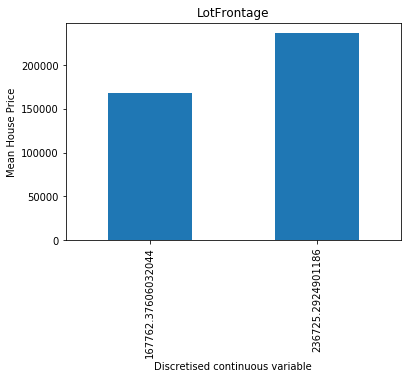

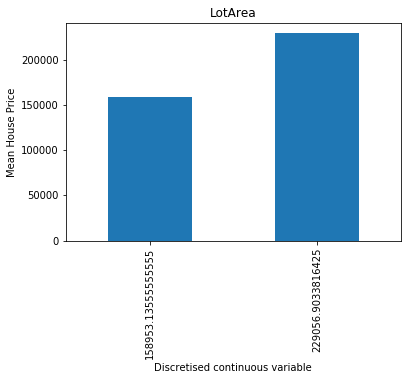

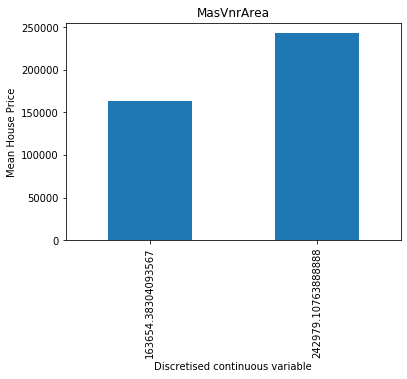

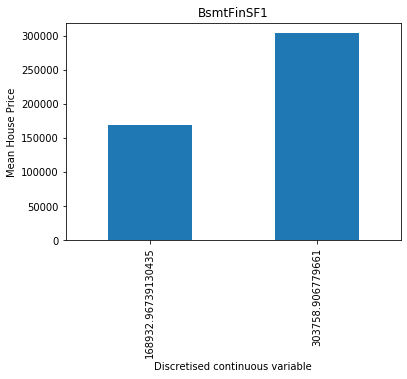

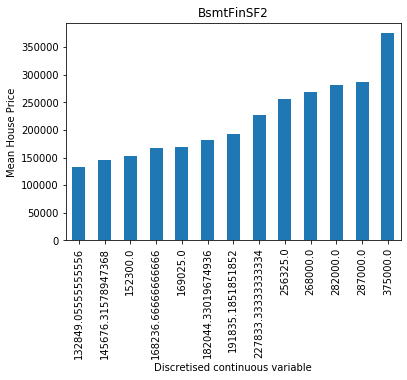

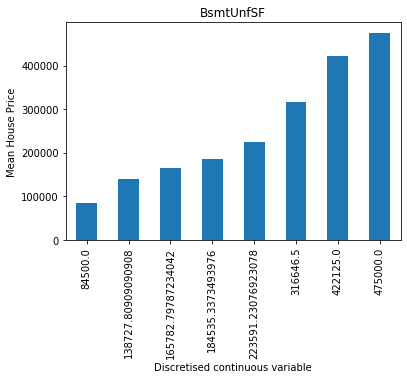

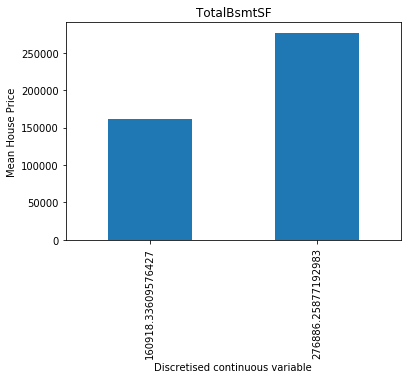

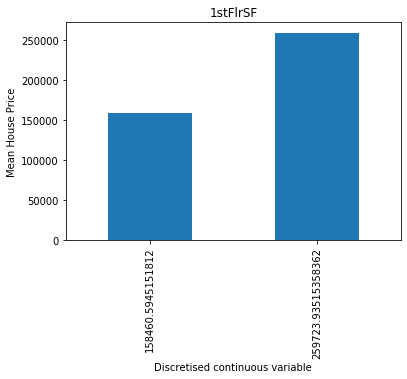

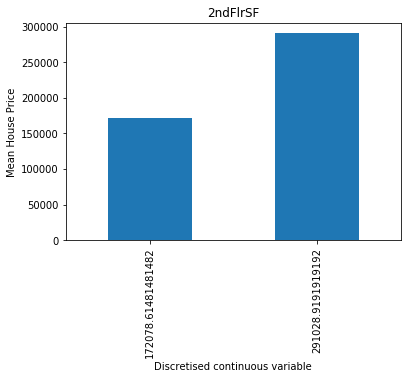

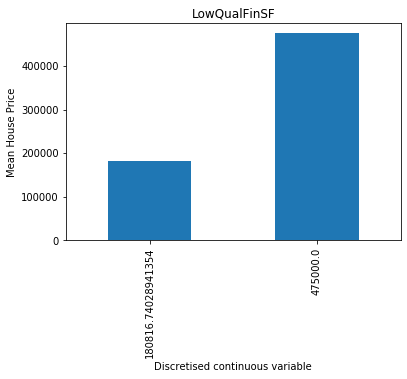

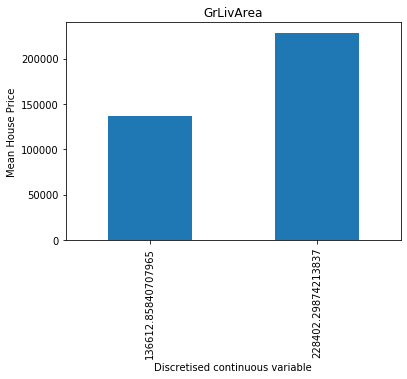

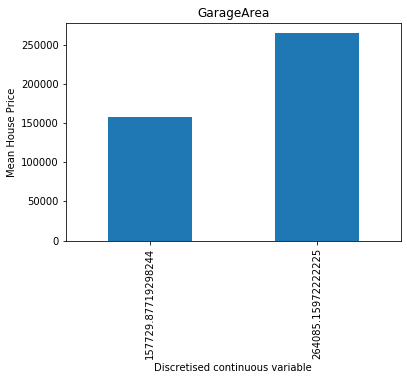

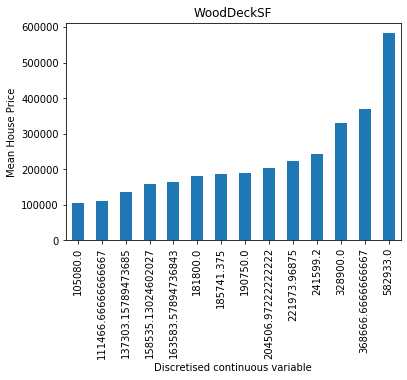

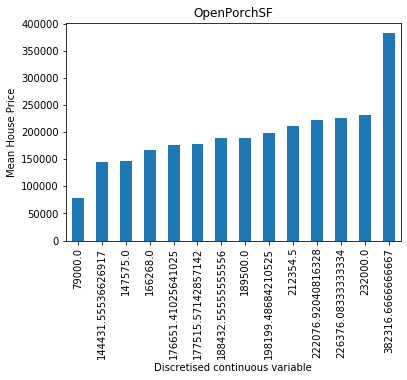

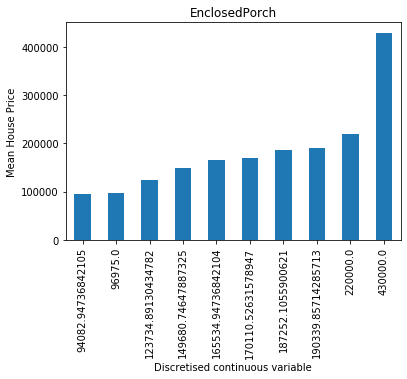

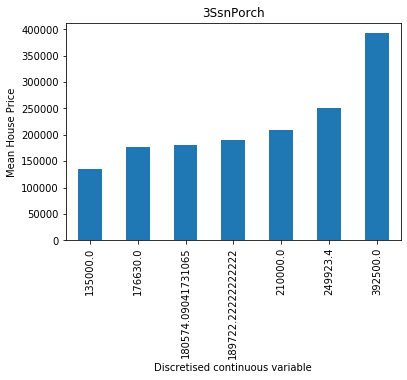

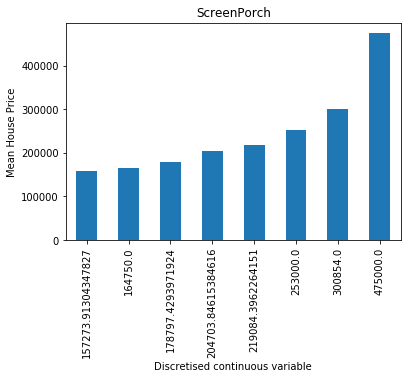

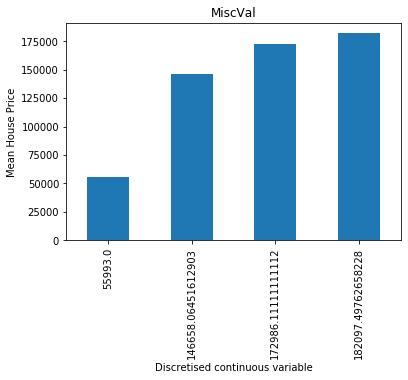

In [44]:
for var in numerical:
    X_train.groupby(var)['SalePrice'].mean().plot.bar()
    plt.title(var)
    plt.ylabel('Mean House Price')
    plt.xlabel('Discretised continuous variable')
    plt.show()

We can see that the mean House Price value increases with the value of the bucket. This means we managed to create a monotonic distribution between the numerical variable and the target.

### Engineering rare labels in categorical and discrete variables 

In [45]:
def rare_imputation(variable):
    # find frequent labels / discrete numbers
    temp = X_train.groupby([variable])[variable].count()/np.float(len(X_train))
    frequent_cat = [x for x in temp.loc[temp>0.03].index.values]
    
    X_train[variable] = np.where(X_train[variable].isin(frequent_cat), X_train[variable], 'Rare')
    X_test[variable] = np.where(X_test[variable].isin(frequent_cat), X_test[variable], 'Rare')
    test[variable] = np.where(test[variable].isin(frequent_cat), test[variable], 'Rare')

In [46]:
# the following vars in the test dataset are encoded in different types
# so first I cast them as int, like in the train set

for var in ['BsmtFullBath', 'BsmtHalfBath', 'GarageCars']:
    test[var] =test[var].astype('int')


In [47]:
# find infrequent labels in categorical variables and replace by Rare
for var in categorical:
    rare_imputation(var)

In [48]:
# find infrequent labels in categorical variables and replace by Rare
# remember that we are treating discrete variables as if they were categorical
for var in discrete:
    rare_imputation(var)

In [50]:
# check that we haven't created missing values in the submission dataset
for var in X_train.columns:
    if var!='SalePrice' and test[var].isnull().sum()>0:
        print(var, test[var].isnull().sum())
        submission_vars.append(var)

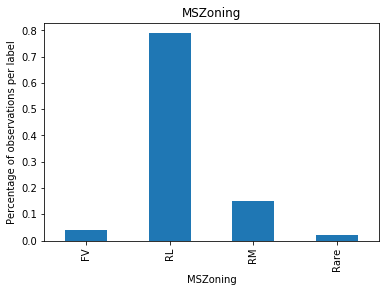

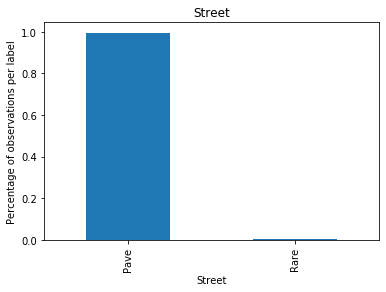

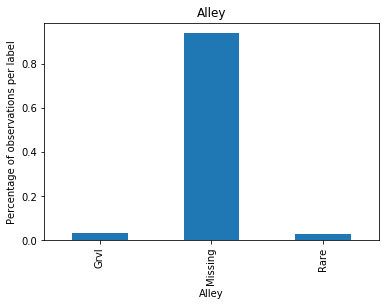

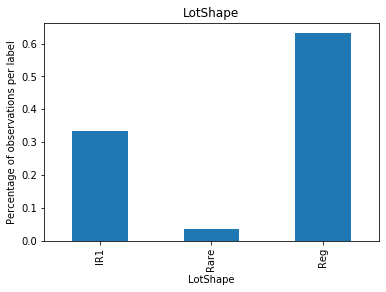

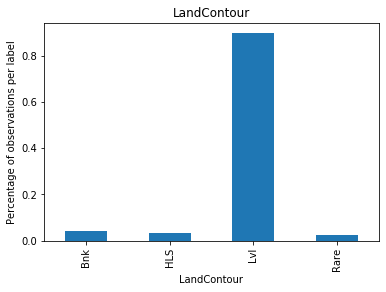

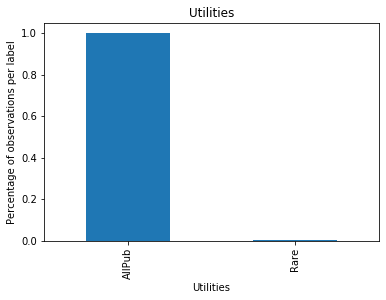

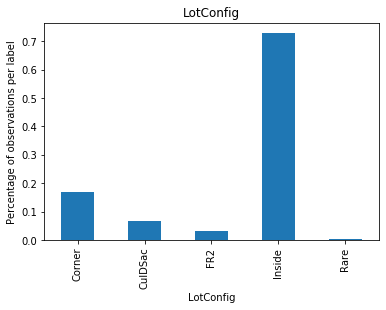

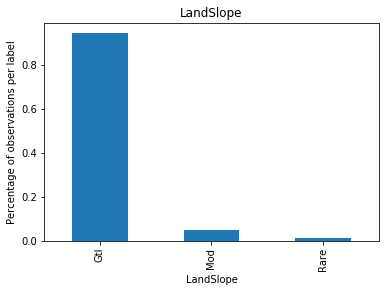

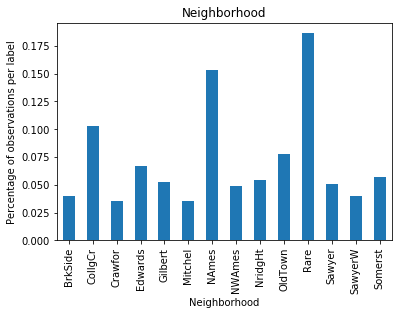

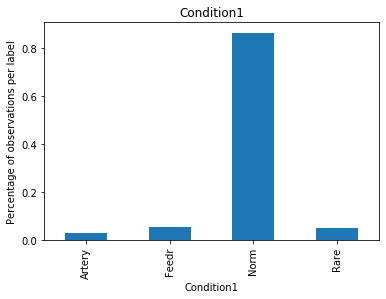

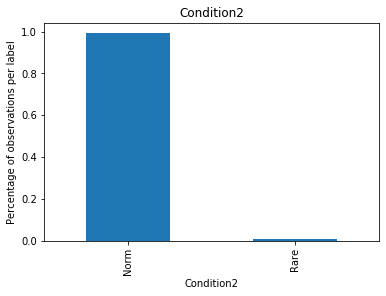

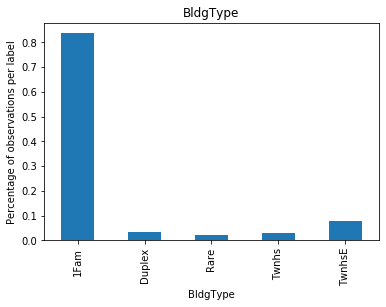

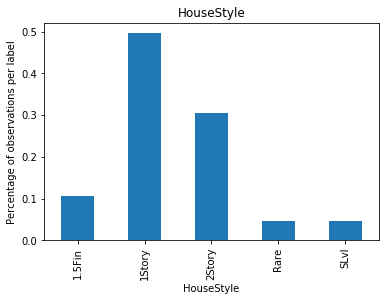

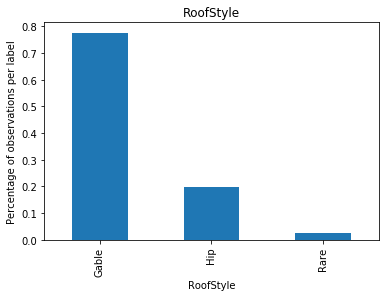

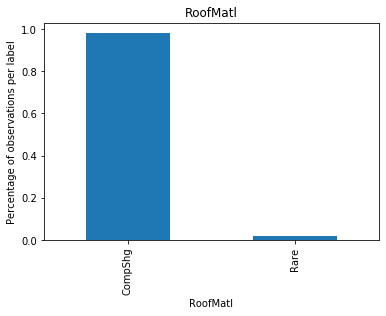

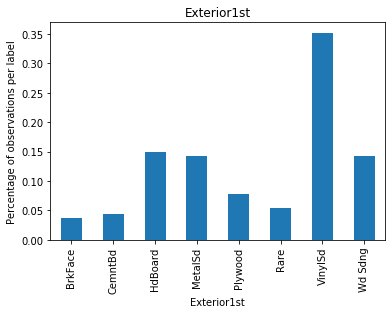

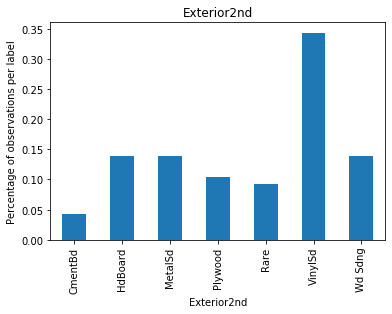

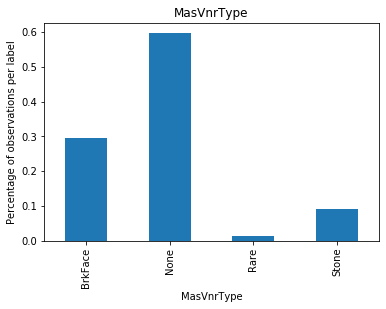

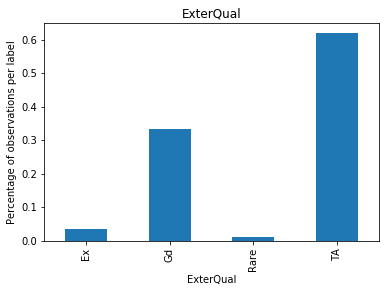

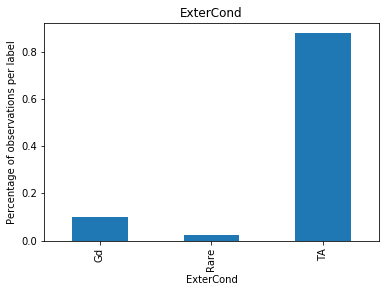

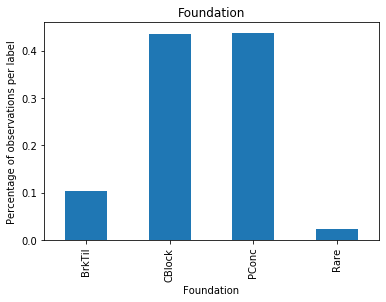

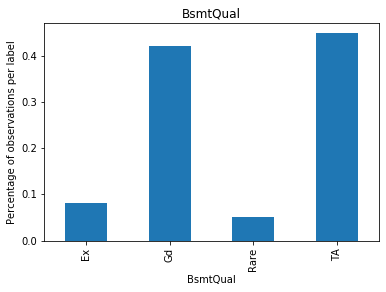

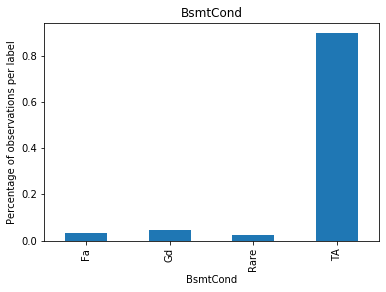

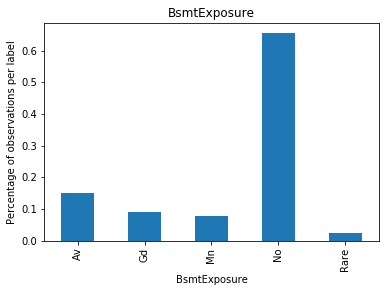

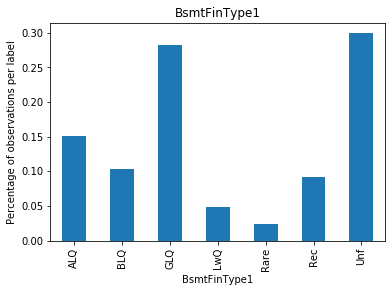

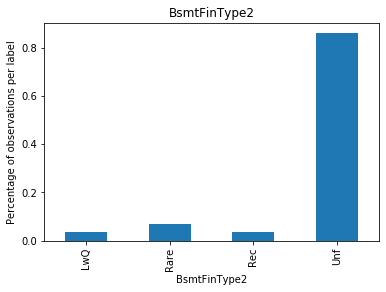

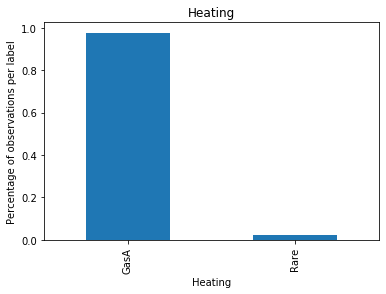

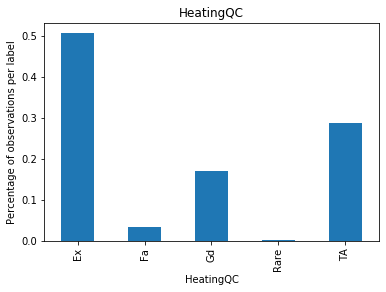

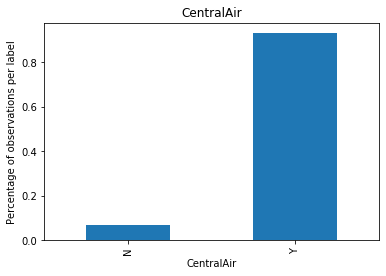

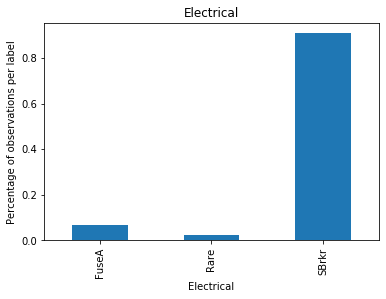

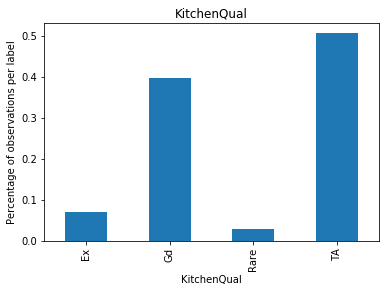

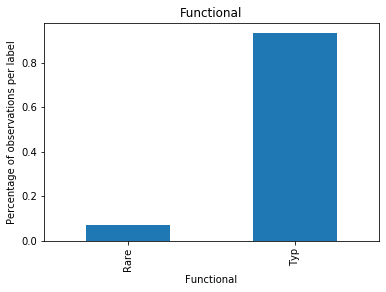

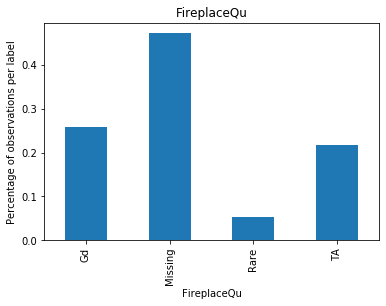

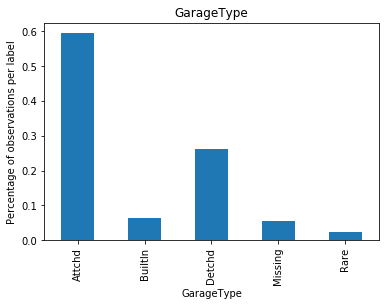

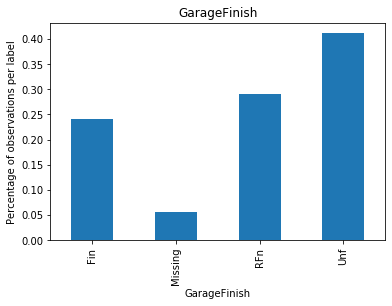

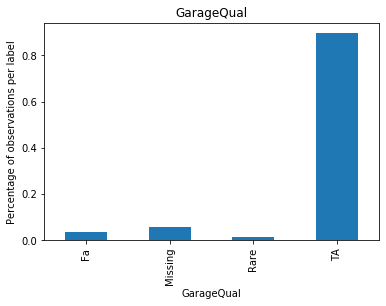

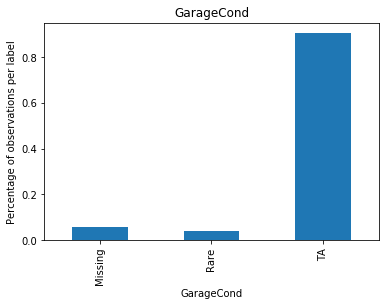

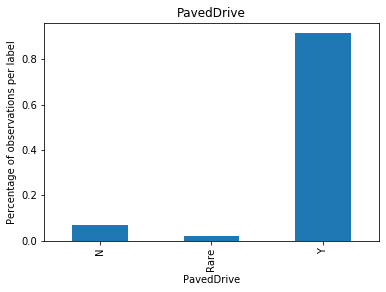

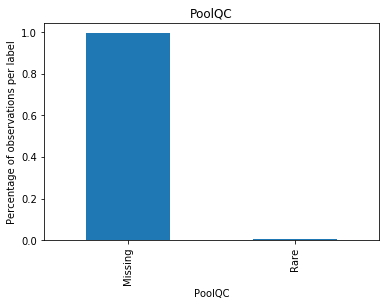

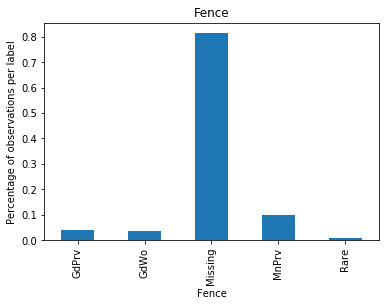

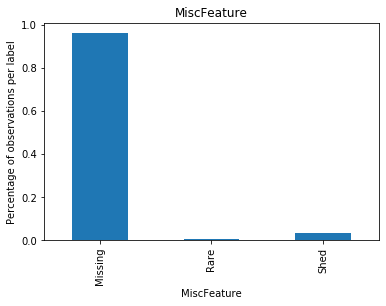

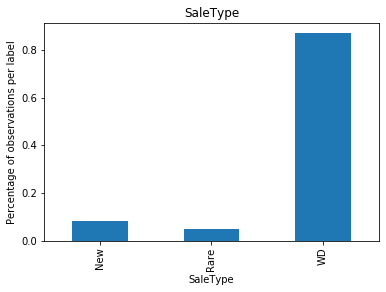

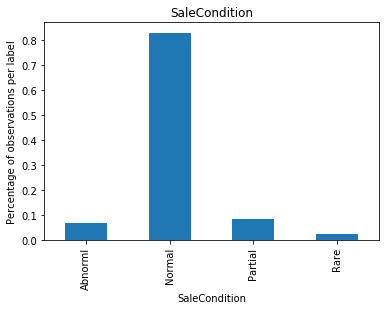

In [51]:
# let's check that it worked
for var in categorical:
    (X_train.groupby(var)[var].count() / np.float(len(X_train))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

We have replaced infrequent labels in both categorical and numerical variables. We see the presence of the label rare in both!

### Encode categorical and discrete variables

I will use target encoding for categorical variables. This way, the labels will be replaced by the mean of the SalePrice, and will remain in a similar scale to the one that now show our numerical variables.

In [52]:
def encode_categorical_variables(var, target):
        # make label to price dictionary
        ordered_labels = X_train.groupby([var])[target].mean().to_dict()
        
        # encode variables
        X_train[var] = X_train[var].map(ordered_labels)
        X_test[var] = X_test[var].map(ordered_labels)
        test[var] = test[var].map(ordered_labels)


In [53]:
# encode labels in categorical vars
for var in categorical:
    encode_categorical_variables(var, 'SalePrice')

In [54]:
# encode labels in discrete vars
for var in discrete:
    encode_categorical_variables(var, 'SalePrice')

In [56]:
# sanity check: let's see that we did not introduce NA by accident
for var in X_train.columns:
    if var!='SalePrice' and test[var].isnull().sum()>0:
        print(var, test[var].isnull().sum())


In [57]:
#let's inspect the dataset
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
930,931,185843.232218,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,204901.363636,229102.255814,181073.785225,176923.341336,179949.742534,203489.946939,184202.50044,181114.067536,185740.182894,176486.047546,273483.000000,203106.269126,2007,2,171319.443683,179722.971296,215247.326134,216064.221239,155917.553571,163654.383041,231040.800000,184094.602253,225871.299130,203881.873188,183805.015293,203036.095960,236866.435484,168932.967391,184463.10168,182044.330197,223591.230769,276886.258772,182115.031931,215075.475976,186569.561275,187320.733445,259723.935154,172078.614815,180816.740289,136612.858407,165147.890464,181297.887994,212795.308696,162838.57265,181029.186111,183542.560606,213391.308429,195928.690789,183618.068684,141047.961353,141047.961353,202501.549872,2.0,239303.034810,309977.853659,264085.159722,187768.181664,188346.234454,186926.069109,185741.375000,176651.410256,187252.10559,180574.090417,178797.429397,180898.631498,180898.631498,187715.285981,182136.371338,182097.497627,184207.900000,173346.078671,175368.825368,201000,0,0
656,657,185843.232218,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,204901.363636,180454.298052,181073.785225,176923.341336,179949.742534,146653.696517,184202.50044,181114.067536,185740.182894,176486.047546,133745.805634,159751.766304,1959,2,171319.443683,179722.971296,161838.040609,166403.519126,205447.897436,163654.383041,231040.800000,184094.602253,150529.160558,141171.125637,183805.015293,166205.981395,161723.106061,168932.967391,184463.10168,182044.330197,184535.337349,160918.336096,182115.031931,215075.475976,186569.561275,187320.733445,158460.594515,172078.614815,180816.740289,136612.858407,203574.293893,181297.887994,135514.882453,212163.63843,181029.186111,183542.560606,213391.308429,141752.929461,183618.068684,141047.961353,141047.961353,202501.549872,49.0,202789.618799,128360.834835,157729.877193,187768.181664,188346.234454,186926.069109,158535.130246,144431.555366,187252.10559,180574.090417,178797.429397,180898.631498,180898.631498,145283.748092,182136.371338,182097.497627,185207.736364,173346.078671,175368.825368,145500,0,0
45,46,200763.148148,191356.98166,167762.37606,158953.135556,181219.432391,183647.568532,164928.283474,180454.298052,181073.785225,176923.341336,179949.742534,315191.901408,184202.50044,181114.067536,182123.300971,176486.047546,294348.576923,203106.269126,2005,5,219039.383142,179722.971296,148333.844920,148397.961538,205447.897436,242979.107639,371951.531915,184094.602253,225871.299130,327072.598131,183805.015293,166205.981395,236866.435484,168932.967391,184463.10168,182044.330197,223591.230769,276886.258772,182115.031931,215075.475976,186569.561275,187320.733445,259723.935154,172078.614815,180816.740289,228402.298742,203574.293893,181297.887994,212795.308696,162838.57265,158790.238390,183542.560606,324619.989011,161003.847645,183618.068684,212674.463918,228513.814159,202501.549872,5.0,202789.618799,184038.209459,157729.877193,187768.181664,188346.234454,186926.069109,221973.968750,222076.920408,187252.10559,180574.090417,178797.429397,180898.631498,180898.63

### Feature scaling

In [58]:
X_train.describe()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,LotFrontage_NA,GarageYrBlt_NA
count,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000,1314.000000
mean,736.230594,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,1970.940639,23.031202,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,29.426180,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,181040.624049,0.177321,0.056317
std,422.410752,38808.314261,26199.490720,27202.168491,32578.624196,2894.262502,11596.886609,22203.246215,12496.527972,1202.064041,12252.421306,4473.563558,46324.135172,12378.889534,799.639940,14443.396437,22118.086370,55373.367775,25689.624796,30.379817,20.674420,18987.049945,9465.046408,31222.482231,29849.145703,34692.124836,32828.304387,55307.593633,11738.300408,40048.407098,54135.969770,18564.012040,31474.766214,37025.161496,38561.152257,8936.859617,12458.876505,26757.025792,43932.929977,7031.636148,35121.370816,20397.476096,19824.089401,42166.629312,31408.069863,8115.593269,45888.734488,19155.180393,1231.986901,43969.360794,23778.354096,18218.274540,11460.774121,53401.249548,39020.198392,9452.511123,38521.652511,38773.307482,39521.671622,24.168823,43879.853129,56100.658727,44014.821429,22988.130523,22934.186102,19330.485641,32056.720234,37326.620936,19655.245498,7426.510849,14425.004989,2097.293089,2097.293089,15505.675991,5456.509673,6464.119661,6799.785827,29337.716048,30218.52055

We can see that because, we used the SalePrice target to encode both our numerical continuous and discrete and categorical variables, all our variables show the mean house price as mean value. The standard deviation however, varies, following the nature of the original variable.

In [60]:
# let's create a list of the training variables
training_vars = [var for var in X_train.columns if var not in ['Id', 'SalePrice']]

print('total number of variables to use for training: ', len(training_vars))



total number of variables to use for training:  80


In [61]:
training_vars

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [63]:

# feature scaling
from sklearn.preprocessing import MinMaxScaler
# fit scaler
scaler = MinMaxScaler() # create an instance
scaler.fit(X_train[training_vars]) #  fit  the scaler to the train set for later use

MinMaxScaler(copy=True, feature_range=(0, 1))

In [64]:
MinMaxScaler(copy=True, feature_range=(0, 1))
#The scaler is now ready, we can use it in a machine learning algorithm when required

MinMaxScaler(copy=True, feature_range=(0, 1))

# Machine Learning algorithm building

Note

The distribution of SalePrice is also skewed, so I will fit the model to the log transformation of the house price.

Then, to evaluate the models, we need to convert it back to prices.

### XG

In [67]:
import xgboost as xgb
# to evaluate the models
from sklearn.metrics import mean_squared_error
from math import sqrt

xgb_model = xgb.XGBRegressor()

eval_set = [(X_test[training_vars], np.log(y_test))]
xgb_model.fit(X_train[training_vars], np.log(y_train), eval_set=eval_set, verbose=False)

pred = xgb_model.predict(X_train[training_vars])
print('xgb train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('xgb train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))
print()
pred = xgb_model.predict(X_test[training_vars])
print('xgb test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('xgb test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

[14:48:21] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
xgb train mse: 398789791.5884174
xgb train rmse: 19969.72187058241

xgb test mse: 1238472423.1226974
xgb test rmse: 35191.93690496017


In [68]:
#This model shows some over-fitting. Compare the rmse for train and test.

### RandomForestRegressor

In [69]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=800, max_depth=6)
rf_model.fit(X_train[training_vars], np.log(y_train))

pred = rf_model.predict(X_train[training_vars])
print('rf train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('rf train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))

print()
pred = rf_model.predict(X_test[training_vars])
print('rf test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('rf test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

rf train mse: 607406393.7523
rf train rmse: 24645.616116305555

rf test mse: 1420427550.3420675
rf test rmse: 37688.55993988186


In [70]:
from sklearn.svm import SVR
SVR_model = SVR()
SVR_model.fit(scaler.transform(X_train[training_vars]), np.log(y_train))

pred = SVR_model.predict(X_train[training_vars])
print('SVR train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('SVR train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))

print()
pred = SVR_model.predict(X_test[training_vars])
print('SVR test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('SVR test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))


SVR train mse: 7308220202.373412
SVR train rmse: 85488.12901434569

SVR test mse: 7860003131.823342
SVR test rmse: 88656.65869985933


### Regularised linear regression


In [71]:
from sklearn.linear_model import LinearRegression, Lasso

lin_model = Lasso(random_state=2909, alpha=0.005)
lin_model.fit(scaler.transform(X_train[training_vars]), np.log(y_train))

pred = lin_model.predict(scaler.transform(X_train[training_vars]))
print('Lasso Linear Model train mse: {}'.format(mean_squared_error(y_train, np.exp(pred))))
print('Lasso Linear Model train rmse: {}'.format(sqrt(mean_squared_error(y_train, np.exp(pred)))))

print()
pred = lin_model.predict(scaler.transform(X_test[training_vars]))
print('Lasso Linear Model test mse: {}'.format(mean_squared_error(y_test, np.exp(pred))))
print('Lasso Linear Model test rmse: {}'.format(sqrt(mean_squared_error(y_test, np.exp(pred)))))

Lasso Linear Model train mse: 1141198182.4195993
Lasso Linear Model train rmse: 33781.62492272388

Lasso Linear Model test mse: 1564310086.6587048
Lasso Linear Model test rmse: 39551.360111362854
